## **Mission 1 : Exploration et préparation des données**

### 1. Charger les données et effectuer une analyse exploratoire.

Chargement des données

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

In [ ]:
print(list(housing))

['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']


Aperçu des colonnes

In [ ]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
housing.target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
housing.data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


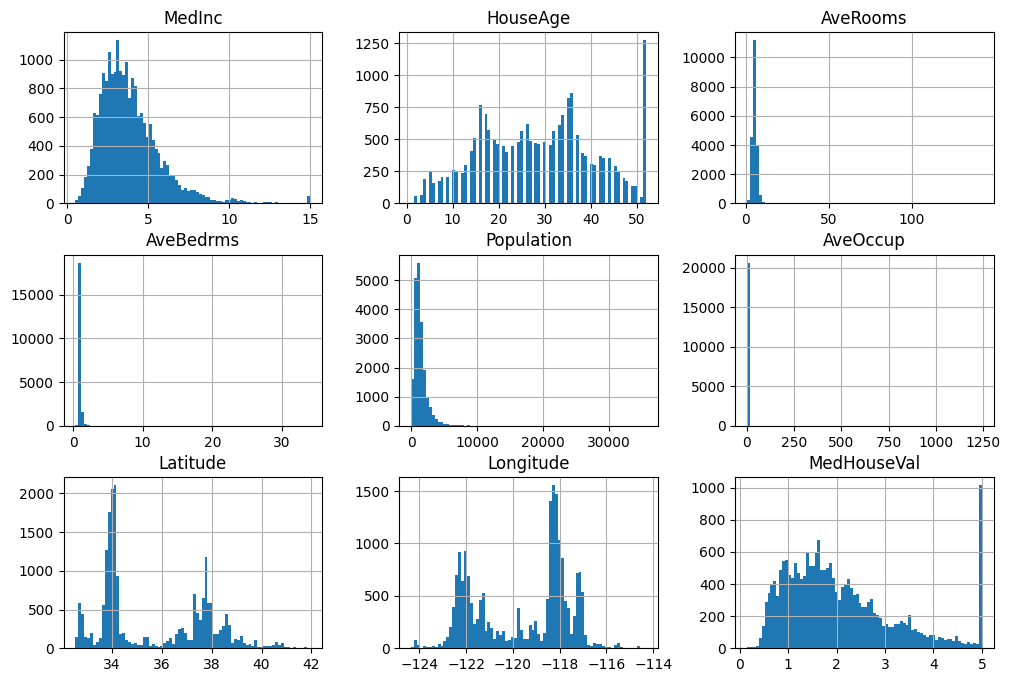

In [ ]:
# Extract the combined DataFrame
import matplotlib.pyplot as plt
housing_df = housing.frame

# Display histograms for all numerical columns
housing_df.hist(bins=80, figsize=(12,8))
plt.show()

* Revenu médian (MedInc) : la distribution présente une majorité de revenus proches de la normale, avec quelques valeurs très élevées qui étendent la plage des données.

* Âge médian des maisons (HouseAge) : la répartition est relativement uniforme. Les valeurs sont plafonnées à 50.

* le prix médian des maisons (MedHouseVal) : les prix sont limités à un maximum de 5, et la distribution montre une queue longue, avec un effet de seuil pour les valeurs élevées.

* Autres variables (AveRooms, AveBedrms, Population, AveOccup) : Ces caractéristiques couvrent un large éventail de valeurs. Les plus grandes valeurs sont rares et pourraient être considérées comme des points aberrants.

**GEOSPATIAL PLOT**

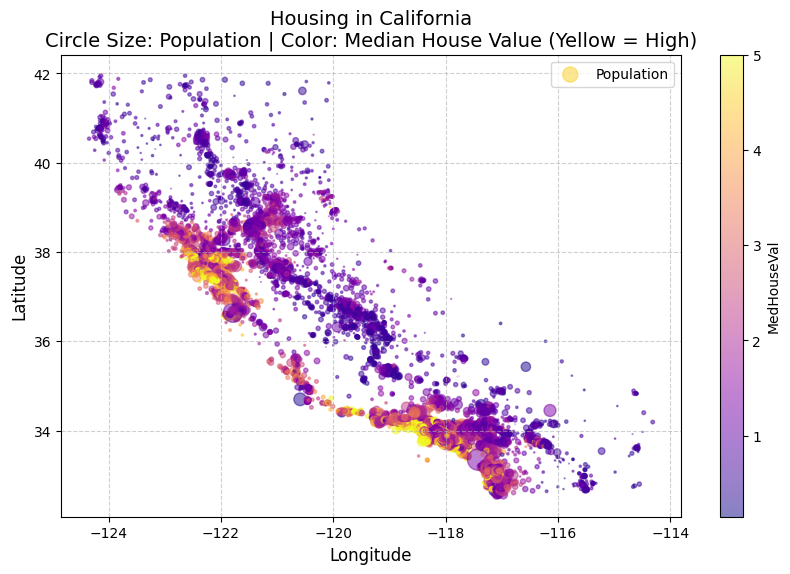

In [ ]:
import matplotlib.pyplot as plt

housing_df_copy = housing_df.copy()
# Tracer le graphique

housing_df.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
    alpha=0.5,
    s=housing_df['Population'] / 150,  # Adjust circle size
    label='Population',
    c='MedHouseVal',  # Color by median house value
    cmap='plasma',  # Yellow for the highest values
    colorbar=True,
    figsize=(10, 6)
)

# Adding title and labels
plt.title("Housing in California\nCircle Size: Population | Color: Median House Value (Yellow = High)", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Le graphique met en évidence la corrélation significative entre les prix des logements et plusieurs facteurs géographiques et démographiques. On observe notamment que la proximité de l'océan semble avoir un impact direct sur les valeurs immobilières, tandis que la densité de population joue également un rôle déterminant, les zones plus densément peuplées étant généralement associées à des prix plus élevés.

**Recherche des corrélations**

Nous allons etudier les Corrélations des Variables avec la Variable Cible MedHouseVal

In [ ]:
corr = housing_df.corr()
corr['MedHouseVal'].sort_values(ascending=True)

,MedHouseVal
Latitude,-0.144160
AveBedrms,-0.046701
Longitude,-0.045967
Population,-0.024650
AveOccup,-0.023737
HouseAge,0.105623
AveRooms,0.151948
MedInc,0.688075
MedHouseVal,1.000000


La corrélation entre MedHouseVal et MedInc est la plus forte, à 0.688, indiquant qu'un revenu plus élevé est associé à des prix de maisons plus élevés. Les variables AveRooms et HouseAge montrent une corrélation positive faible avec le prix des maisons. En revanche, AveBedrms, Population, et AveOccup ont des corrélations très faibles avec MedHouseVal.
Les variables géographiques Latitude et Longitude sont également faiblement corrélées au prix des maisons, avec une tendance à des prix plus bas en direction du nord.

### 2. Identifier les valeurs manquantes ou aberrantes.

**Vérification des valeurs manquantes:**

La méthode .info() permet d'obtenir un aperçu rapide de la description des données

In [ ]:
housing.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB




*   Pas de données manquantes dans la base de données.
*  Toutes les variables sont numériques de type float.


**Vérifivation des valeurs aberrantes:**

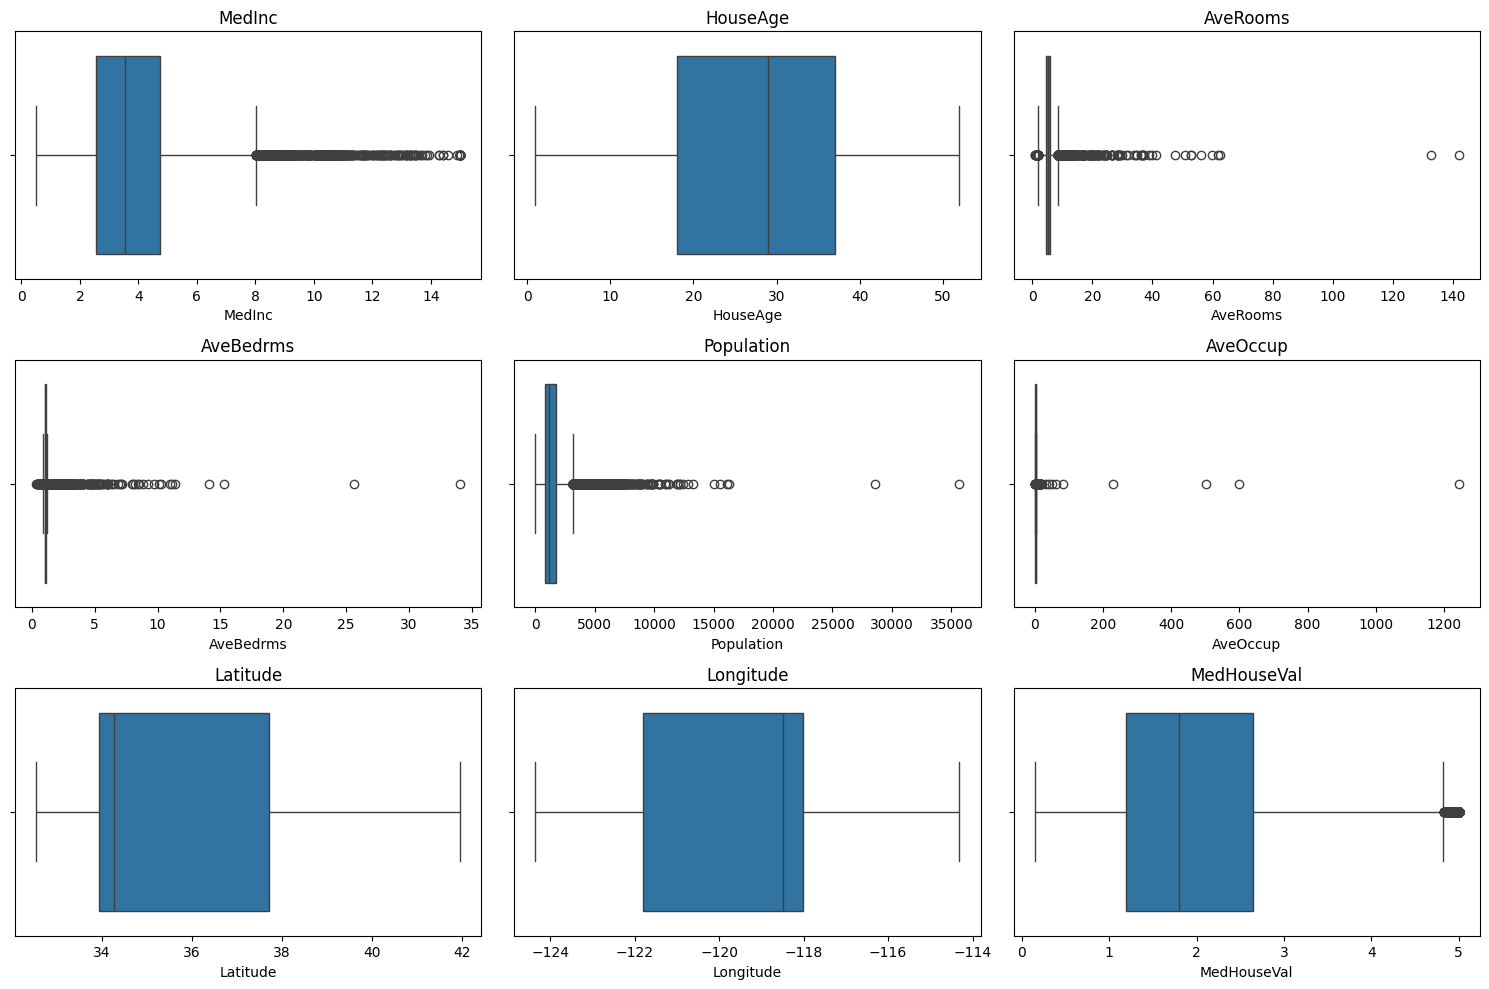

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

housing_df = housing.frame  # Combined DataFrame (features + target)

# Select numeric columns
numeric_columns = housing_df.select_dtypes(include=['float64', 'int']).columns
len_numeric_columns = len(numeric_columns)

# Initialize figure
fig = plt.figure(figsize=(15, 10))

# Set the number of columns for the plot
n_cols = 3

# Calculate the number of rows dynamically
n_plot_rows = (len_numeric_columns + n_cols - 1) // n_cols  # Ensure all columns fit

# Create boxplots
for i, column in enumerate(numeric_columns):
    ax = fig.add_subplot(n_plot_rows, n_cols, i + 1)
    sns.boxplot(x=housing_df[column], orient='h', ax=ax)
    ax.set_title(column)  # Add the column name as the title

# Adjust layout for better spacing
fig.tight_layout()

# Show the plots
plt.show()




D'après les boxplots, on peut observer la présence de valeurs extrêmes dans les variables suivantes : MedInc, AveRooms, AveBedrms, Population et AveOccup.

In [ ]:
# Fonction pour détecter les outliers avec l'IQR
def detect_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)  # Premier quartile
    Q3 = dataframe[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Intervalle interquartile
    lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
    upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
    return dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]

# Initialiser le compteur d'outliers
total_outliers = 0

# Vérifier les outliers pour chaque colonne dans housing_df
for column in housing_df.columns:
    outliers = detect_outliers_iqr(housing_df , column)
    count_outliers = len(outliers)
    total_outliers += count_outliers
    print(f"Colonne: {column} | Nombre d'outliers: {count_outliers}")

# Calcul du pourcentage total des outliers
percentage_outliers = (total_outliers / (housing_df.shape[0] * len(housing_df.columns))) * 100
print(f"\nNombre total d'outliers détectés: {total_outliers}")
print(f"Pourcentage d'outliers par rapport au total: {percentage_outliers:.2f}%")


Colonne: MedInc | Nombre d'outliers: 681
Colonne: HouseAge | Nombre d'outliers: 0
Colonne: AveRooms | Nombre d'outliers: 511
Colonne: AveBedrms | Nombre d'outliers: 1424
Colonne: Population | Nombre d'outliers: 1196
Colonne: AveOccup | Nombre d'outliers: 711
Colonne: Latitude | Nombre d'outliers: 0
Colonne: Longitude | Nombre d'outliers: 0
Colonne: MedHouseVal | Nombre d'outliers: 1071

Nombre total d'outliers détectés: 5594
Pourcentage d'outliers par rapport au total: 3.01%


In [ ]:
# Fonction pour détecter et supprimer les outliers en utilisant l'IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1  # Intervalle interquartile
    lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
    upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
    # On garde les lignes qui ne sont pas des outliers
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Liste des colonnes où il y a des outliers
columns_to_check = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

# la suppression des outliers pour chaque colonne spécifiée
for column in columns_to_check:
    housing_df = remove_outliers_iqr(housing_df, column)

# Nombre d'éléments restants après suppression des outliers
print(f"Nombre de lignes après suppression des outliers: {housing_df.shape[0]}")


Nombre de lignes après suppression des outliers: 16813


In [ ]:
from google.colab import files

# Save your DataFrame to a CSV file
file_path = '/tmp/housing_data.csv'  # Temporary file location
housing_df.to_csv(file_path, index=False)

# Trigger download
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

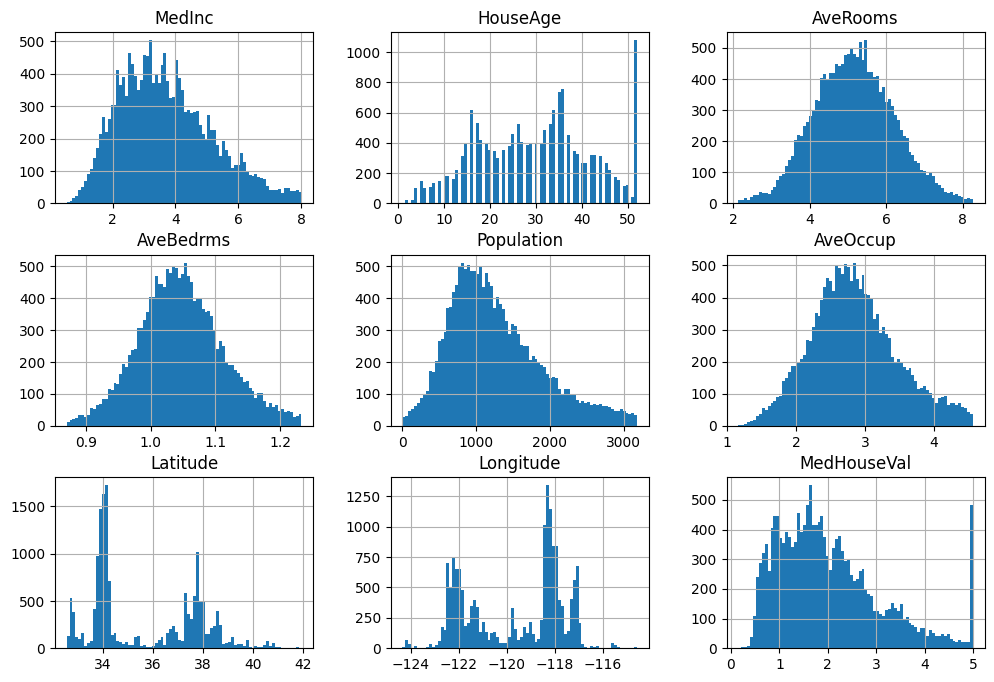

In [ ]:
housing_df.hist(bins=80, figsize=(12,8))
plt.show()

### 3. Normaliser ou standardiser les données si nécessaire.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes à standardiser
columns_to_standardize = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
scaler = StandardScaler()
housing_df[columns_to_standardize] = scaler.fit_transform(housing_df[columns_to_standardize])

# Vérification après standardisation
print(housing_df.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
3  1.306354      52.0  0.622013   0.389206   -1.128897 -0.472753     37.85   
4  0.091339      52.0  1.065587   0.511007   -1.117819 -1.052713     37.85   
5  0.220217      52.0 -0.386119   0.853342   -1.358373 -1.118500     37.85   
6 -0.035173      52.0 -0.223541  -1.458639   -0.280630 -1.136686     37.84   
7 -0.399698      52.0 -0.351866   0.218606   -0.180927 -1.674984     37.84   

   Longitude  MedHouseVal  
3    -122.25        3.413  
4    -122.25        3.422  
5    -122.25        2.697  
6    -122.25        2.992  
7    -122.25        2.414  


In [ ]:
from google.colab import files

# Save your DataFrame to a CSV file
file_path = '/tmp/housing_standardized.csv'  # Temporary file location
housing_df.to_csv(file_path, index=False)

# Trigger download
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nous allons procéder à une division des données en deux ensembles : un ensemble d'entraînement, qui représentera 80 % des données et sera utilisé pour ajuster le modèle, et un ensemble de test, représentant 20 % des données, afin d'évaluer les performances du modèle.

In [ ]:
from sklearn.model_selection import train_test_split

# Définir les caractéristiques (X) et la cible (y)
X = housing_df.drop(columns="MedHouseVal")  # Toutes les colonnes sauf la cible
y = housing_df["MedHouseVal"]  # La colonne cible

# Diviser les données en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
print(f"Taille de l'ensemble de test : {X_test.shape[0]}")

Taille de l'ensemble d'entraînement : 13450
Taille de l'ensemble de test : 3363
